In [7]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time
import copy
import pickle
from multiprocessing import Pool
from config import *
from profit_optimization_core import *
from profit_vs_EEPP_coeff import *

flag_plot = True
atemp = {}
atemp[0] = pickle.load(open('./output/all_data_ssd.pkl','rb'))
atemp[1] = pickle.load(open('./output/all_data_sssd.pkl','rb'))
atemp[2] = pickle.load(open('./output/all_data_ssssd.pkl','rb'))

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
# plt.rc('axes.spines', **{'bottom':False, 'left':False, 'right':False, 'top':False})
X, Y = np.meshgrid(atemp[0][0]['params']['xvals'], atemp[0][0]['params']['yvals'])

In [8]:
params = atemp[2][0]['params']
customers = atemp[2][0]['customers']
s1x,s1y = idx_of_point(params['xvals'],params['yvals'],customers[1]['s'])
d1x,d1y = idx_of_point(params['xvals'],params['yvals'],customers[1]['d'])
s2x,s2y = idx_of_point(params['xvals'],params['yvals'],customers[2]['s'])
s3x,s3y = idx_of_point(params['xvals'],params['yvals'],customers[3]['s'])

In [9]:
indicator_threshold = 0
dot_size = 1000
#https://python-graph-gallery.com/199-matplotlib-style-sheets/
# params['EEPP_coeff_array'] = [1,10,1000] #DELETE THIS

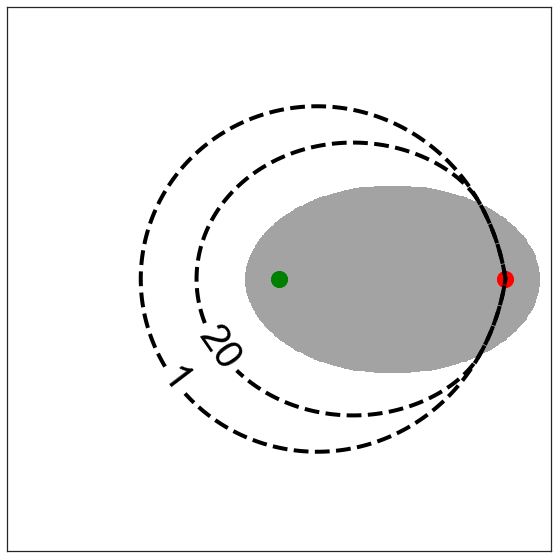

In [10]:
key = 'foc_condition'
key2 = 'deltabars_intersection'
midx = 0
plt.figure(figsize=(10,10))
for idx in range(len(atemp[0])):
#     CS = plt.contour(Y,X, indicator_of2D(atemp[0][idx]['data'][key],indicator_threshold))
#     if idx < len(atemp[0])-1:
    CS = plt.contour(Y,X,atemp[midx][idx]['data'][key],[0],linestyles='dashed',colors='black',linewidths=4.0)
#     else:
#         CS = plt.contour(Y,X,atemp[midx][idx]['data'][key],[0],colors='black')
    ax = plt.gca()
    ax.scatter(customers[1]['s'][0],customers[1]['s'][1], marker='.', s=dot_size, color='green') 
    ax.scatter(customers[1]['d'][0],customers[1]['d'][1], marker='.', s=dot_size, color='red')
#     if idx < len(atemp[0])-1:
    plt.clabel(CS, inline=True,manual=[(-1,-1)], fontsize=40,fmt={0:str(params['EEPP_coeff_array'][idx])})
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(atemp[midx][idx]['data'][key2].transpose(),alpha=.2,extent=
           [params['x_min'],params['x_max'],params['y_min'],params['y_max']])
if flag_plot:
    plt.savefig('./output/fig_sssd'+str(midx)+'.png')

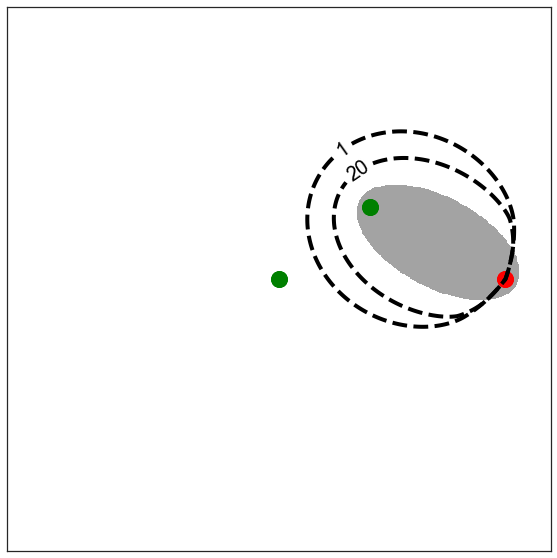

In [11]:
midx = 1
plt.figure(figsize=(10,10))
for idx in range(len(atemp[0])):
    CS = plt.contour(Y,X,atemp[midx][idx]['data'][key],[0],linestyles='dashed',colors='black',linewidths=4.0)
    ax = plt.gca()
    ax.scatter(customers[1]['s'][0],customers[1]['s'][1], marker='.', s=dot_size, color='green') 
    ax.scatter(customers[1]['d'][0],customers[1]['d'][1], marker='.', s=dot_size, color='red')
    if midx >0:
        ax.scatter(customers[2]['s'][0],customers[2]['s'][1], marker='.', s=dot_size, color='green')

    plt.clabel(CS, inline=True,manual=[(1,1)], fontsize=20,fmt={0:str(params['EEPP_coeff_array'][idx])})
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(atemp[midx][idx]['data'][key2].transpose(),alpha=.2,extent=
           [params['x_min'],params['x_max'],params['y_min'],params['y_max']],origin='lower')
if flag_plot:
    plt.savefig('./output/fig_sssd'+str(midx)+'.png')


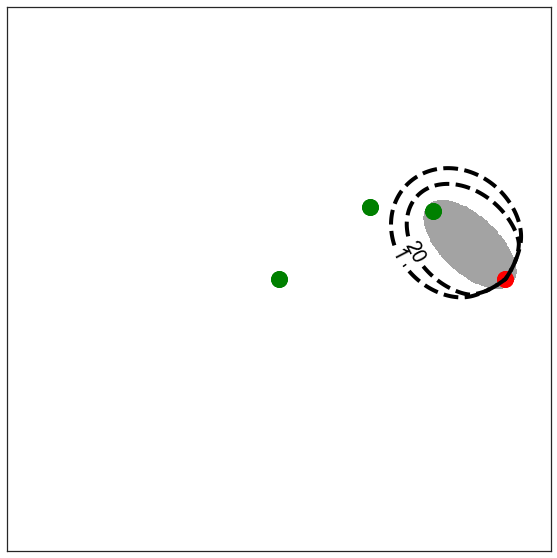

In [12]:
midx = 2
plt.figure(figsize=(10,10))
for idx in range(len(atemp[0])):
    CS = plt.contour(Y,X,atemp[midx][idx]['data'][key],[0],linestyles='dashed',colors='black',linewidths=4.0)
    ax = plt.gca()
    ax.scatter(customers[1]['s'][0],customers[1]['s'][1], marker='.', s=dot_size, color='green') 
    ax.scatter(customers[1]['d'][0],customers[1]['d'][1], marker='.', s=dot_size, color='red')
    if midx >0:
        ax.scatter(customers[2]['s'][0],customers[2]['s'][1], marker='.', s=dot_size, color='green')
    if midx > 1:
        ax.scatter(customers[3]['s'][0],customers[3]['s'][1], marker='.', s=dot_size, color='green')

#     if idx < len(atemp[0])-1:
    plt.clabel(CS, inline=True,manual=[(-1,-1)], fontsize=20,fmt={0:str(params['EEPP_coeff_array'][idx])})
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(atemp[midx][idx]['data'][key2].transpose(),alpha=.2,extent=
           [params['x_min'],params['x_max'],params['y_min'],params['y_max']],origin='lower')
if flag_plot:     
    plt.savefig('./output/fig_sssd'+str(midx)+'.png')